# Description

File used: [bank_additional_full](./Data/bank-additional/bank-additional/bank-additional-full_1.1.csv) <br>
Information about data in file: [info](./Data/bank-additional/bank-additional/bank-additional-names.txt)

# Loading Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer#, Imputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

dataFilePath = './Data/bank-additional/bank-additional/bank-additional-full_1.1.csv'
originalDataset = pd.read_csv(dataFilePath)
originalDataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


# Data Statistics

In [11]:
originalDataset.shape

(41188, 21)

In [12]:
originalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
originalDataset.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.019010,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.178074,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4964.000000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.000000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.000000,NaN


In [14]:
originalSetWithoutDups = originalDataset.drop_duplicates()
originalSetWithoutDups.shape

(41176, 21)

In [15]:
originalSetWithoutDups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [16]:
originalSetWithoutDups.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,...,41176.000000,41176.000000,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,...,NaN,NaN,NaN,35551,NaN,NaN,NaN,NaN,NaN,36537
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567879,962.464810,0.173013,NaN,0.081922,93.575720,-40.502863,3.621293,5167.017972,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770318,186.937102,0.494964,NaN,1.570883,0.578839,4.627860,1.734437,72.177913,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4964.000000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.000000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.000000,NaN


## Information about columns

In [17]:
originalSetWithoutDups.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


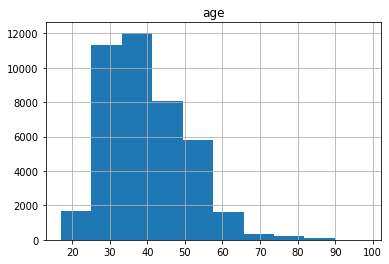

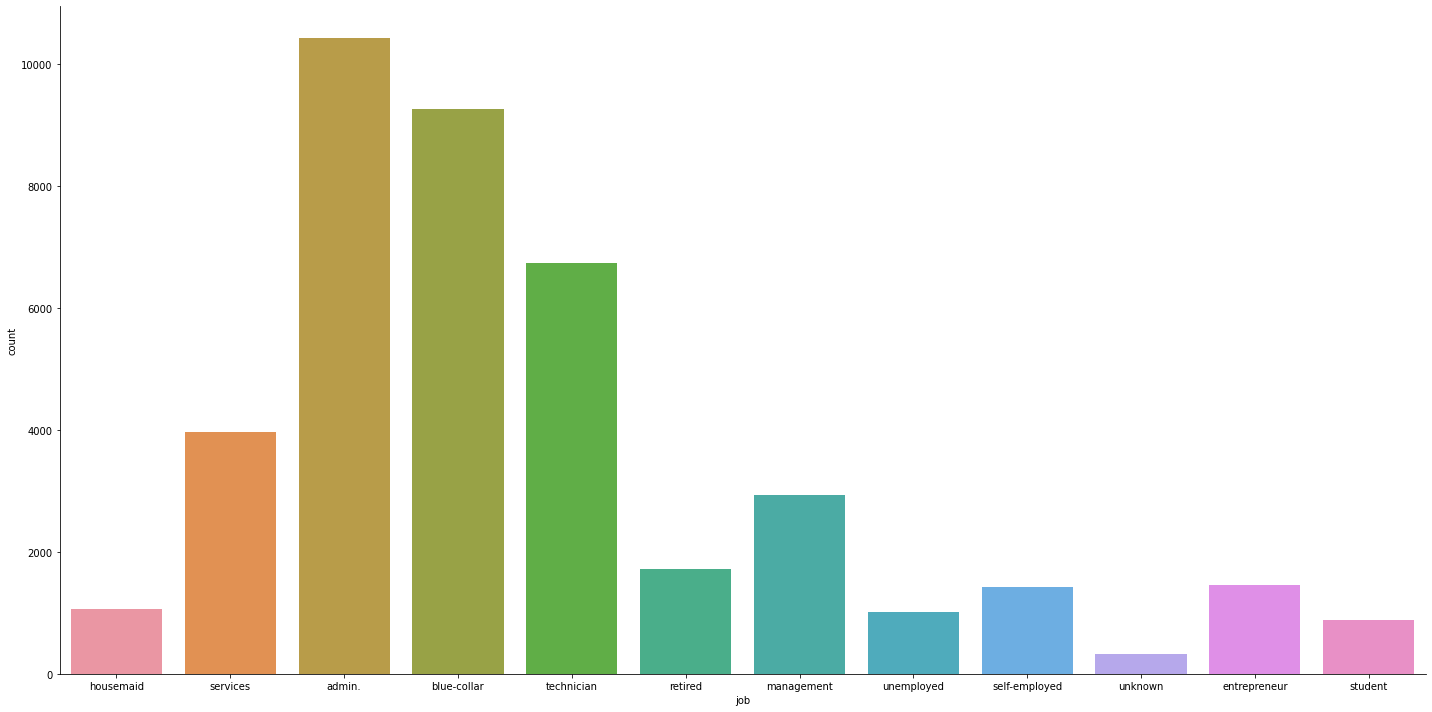

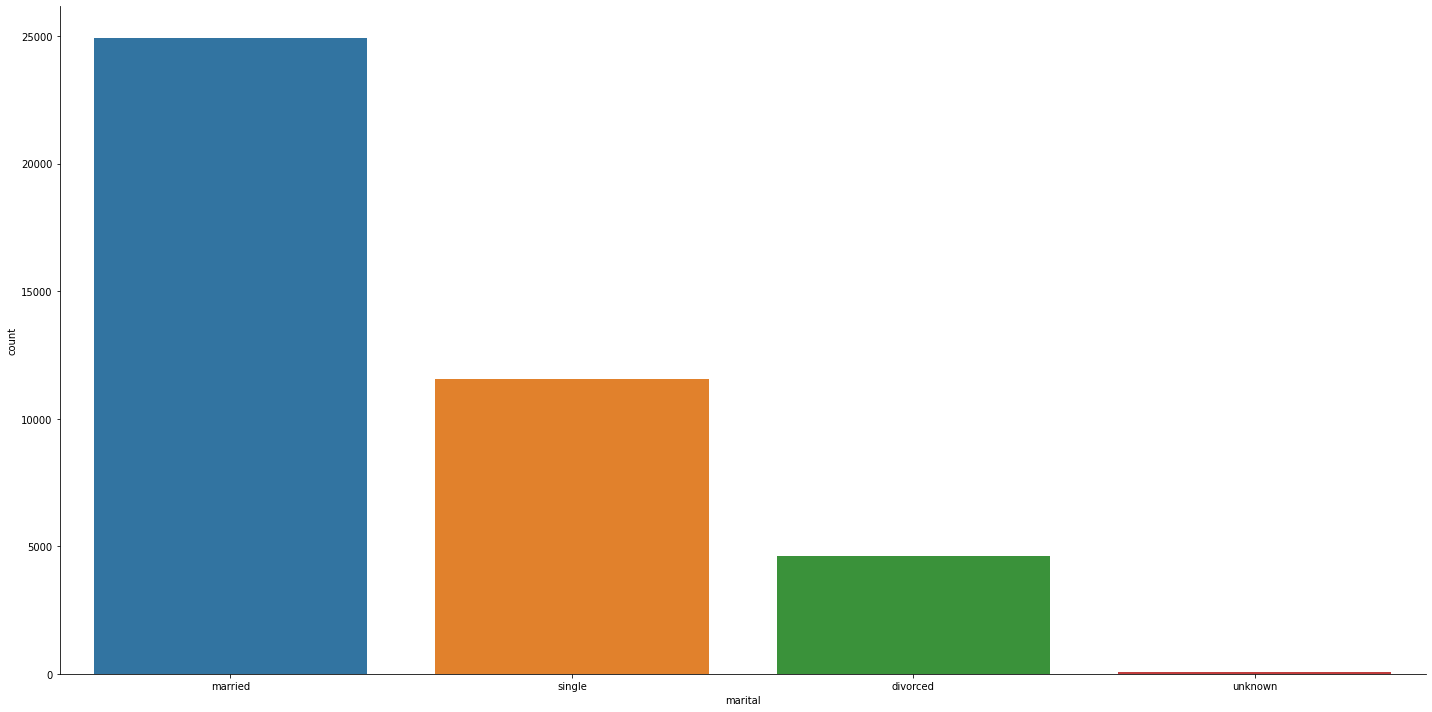

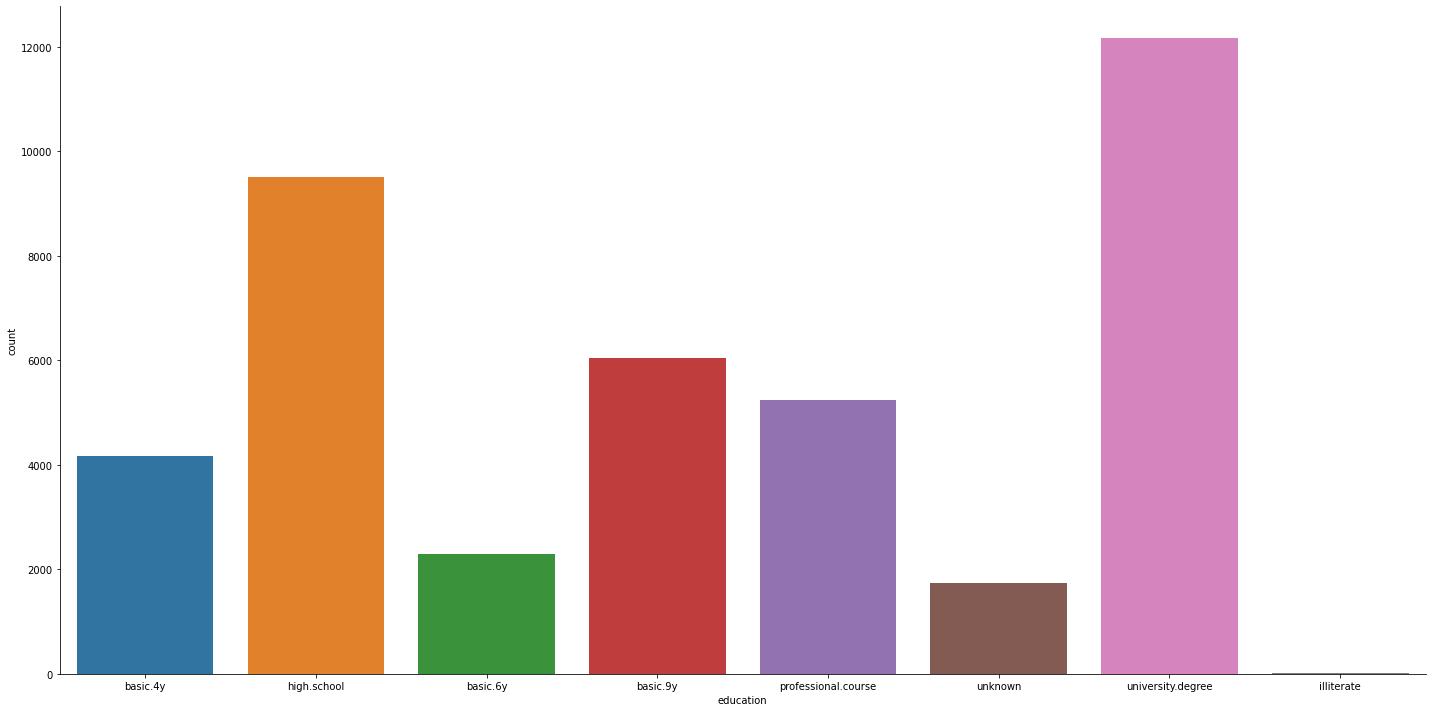

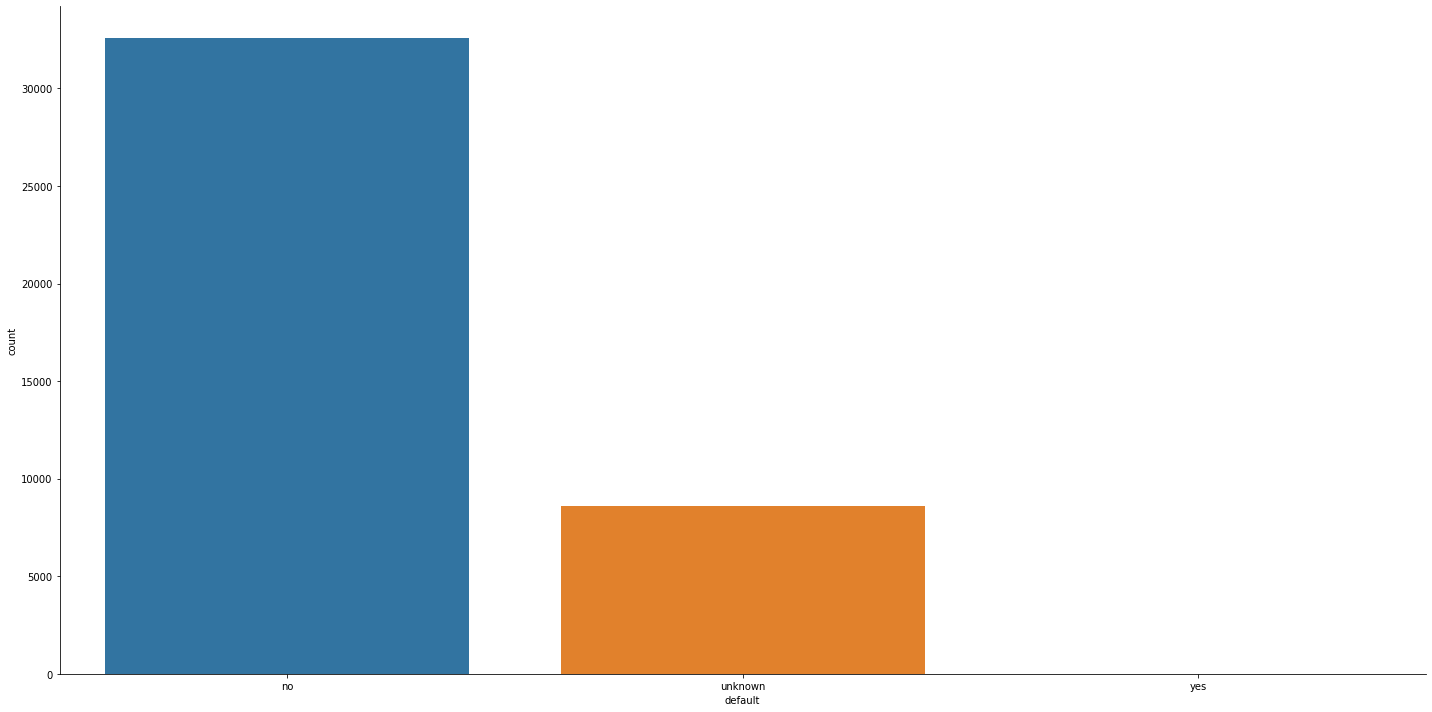

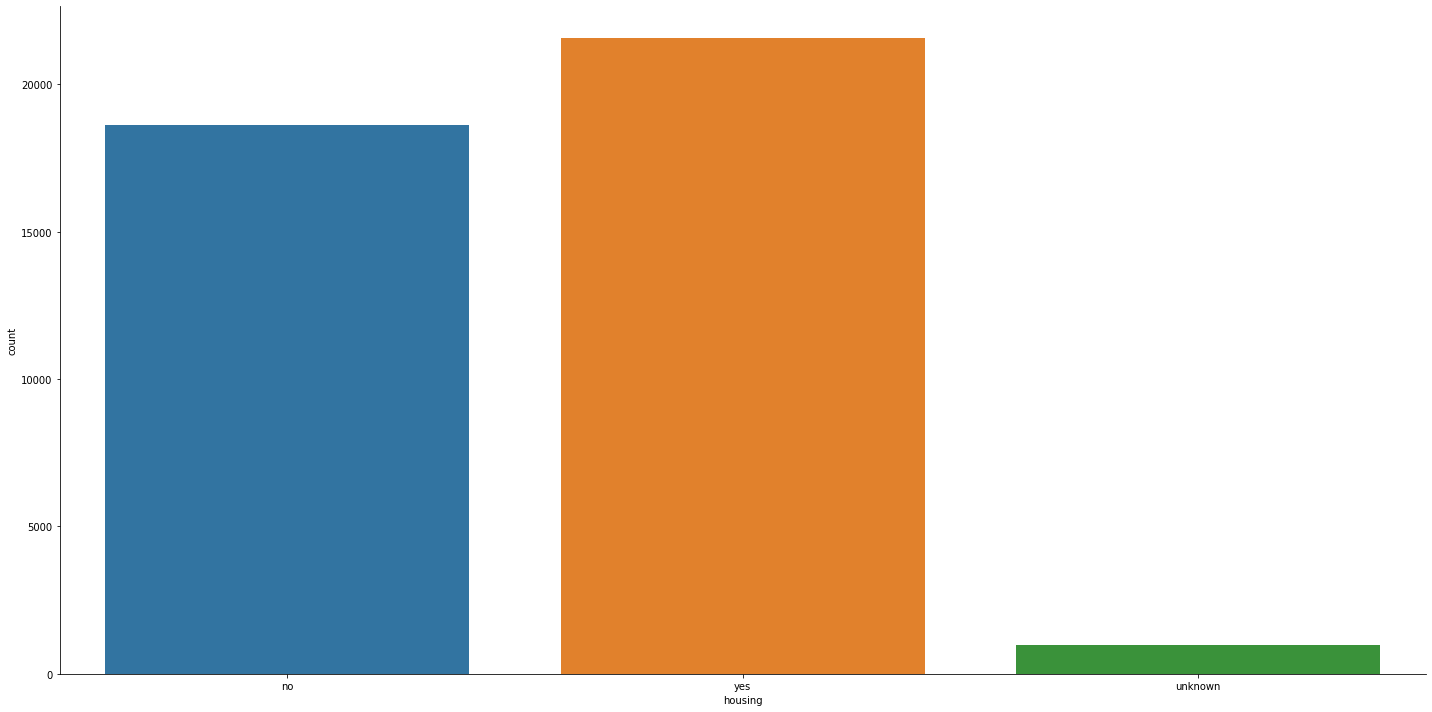

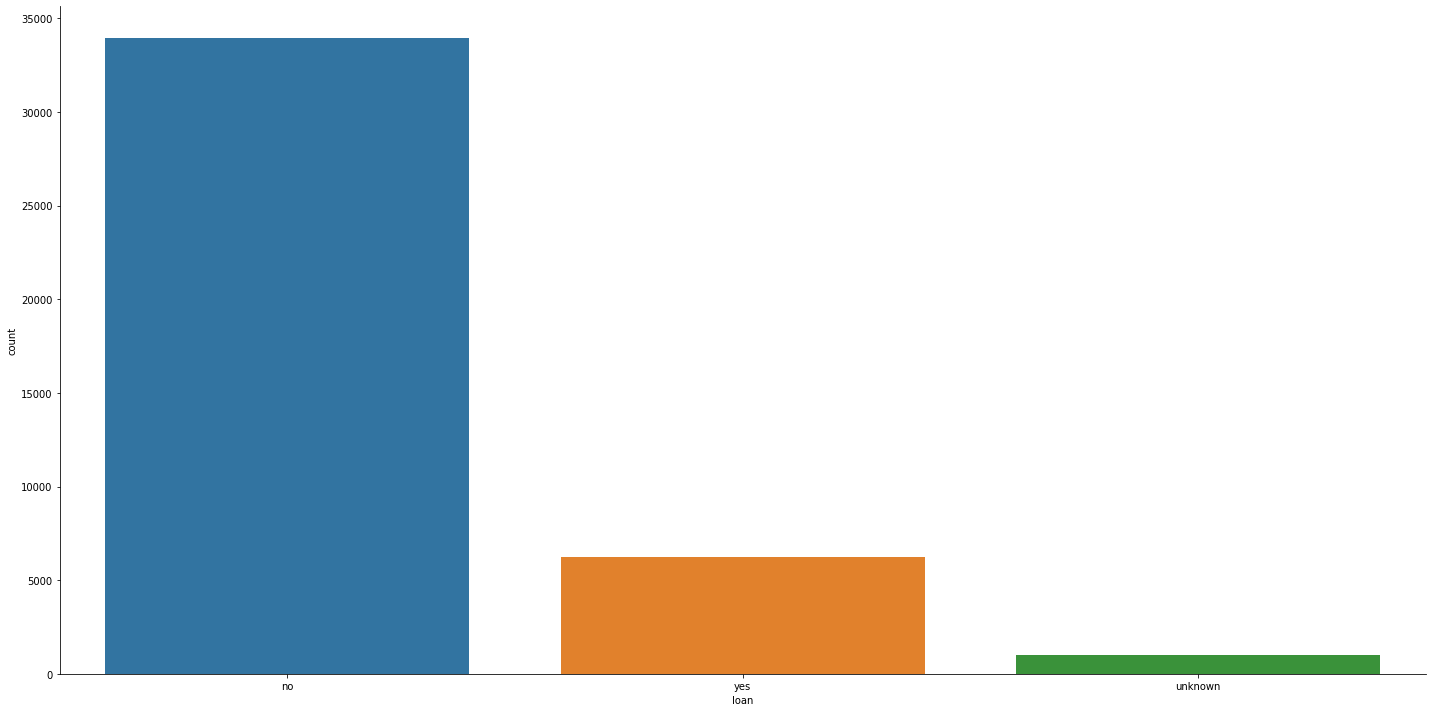

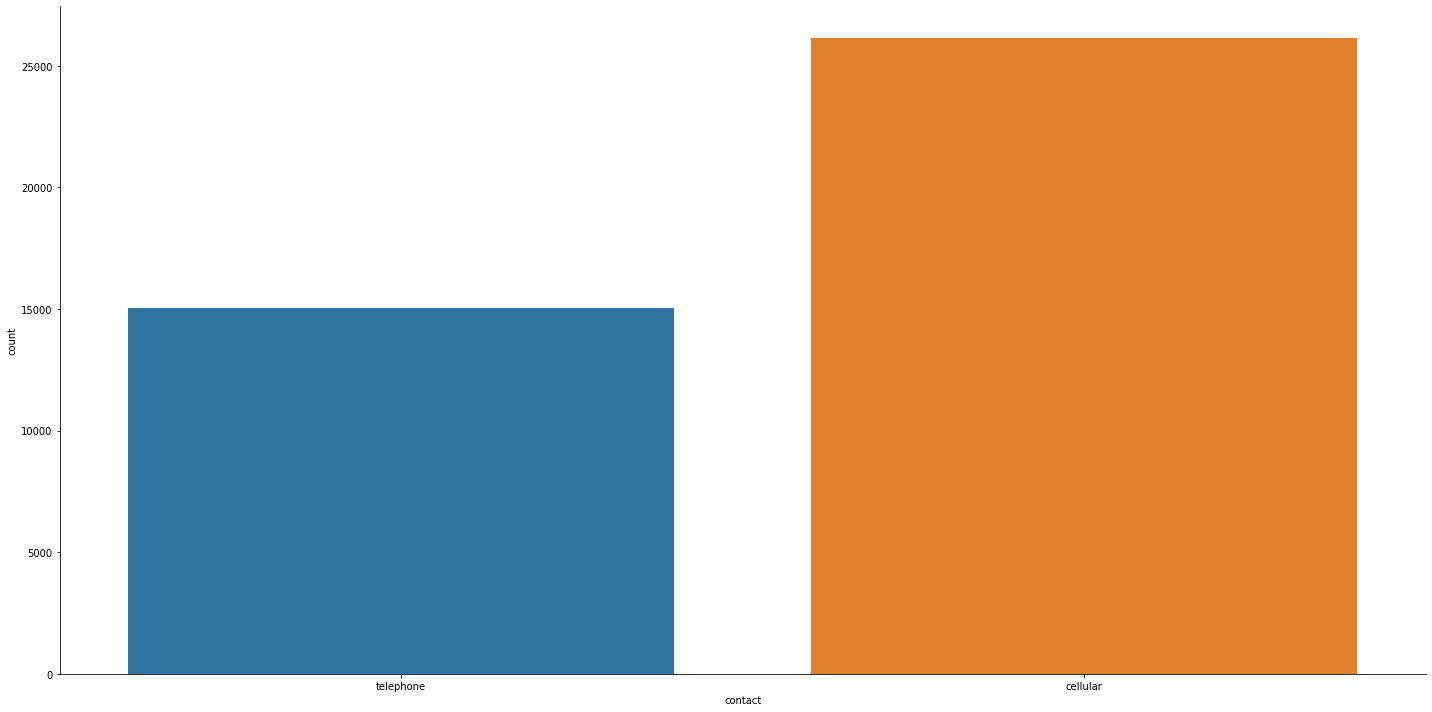

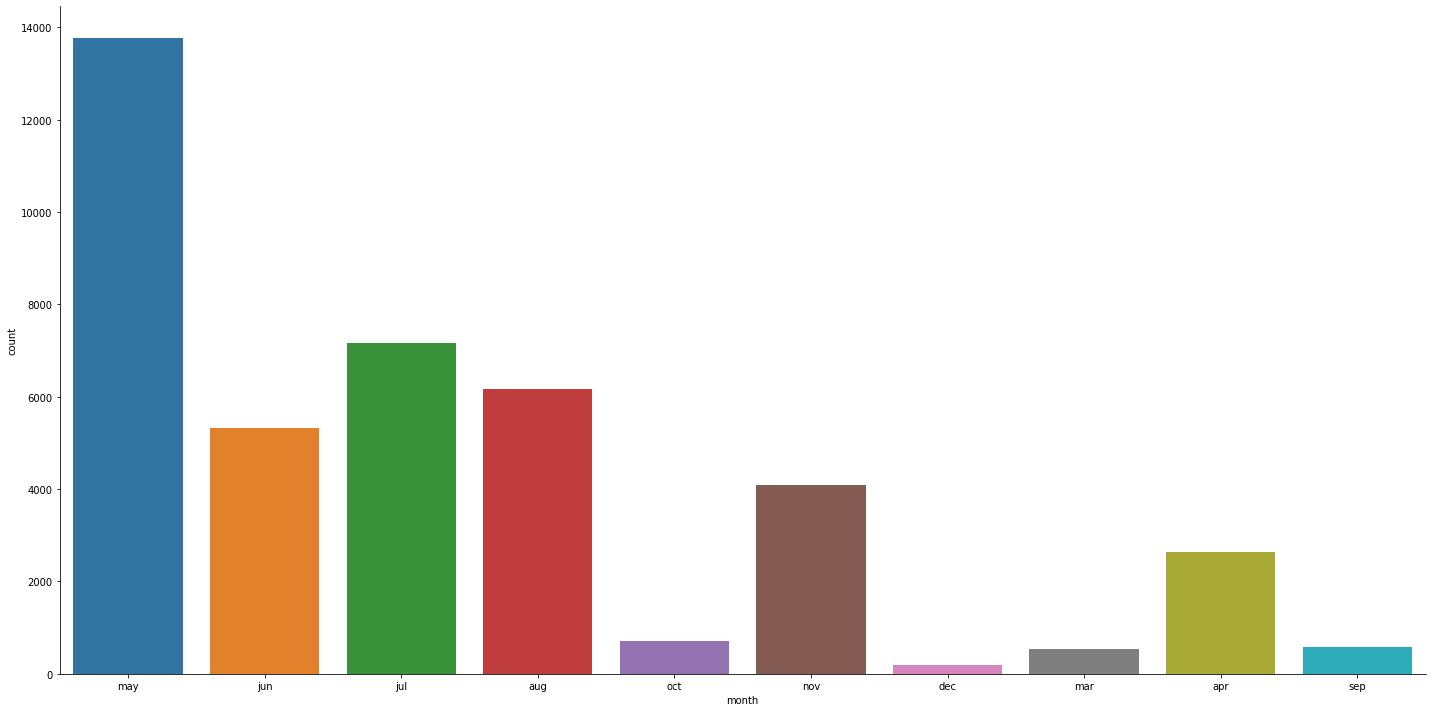

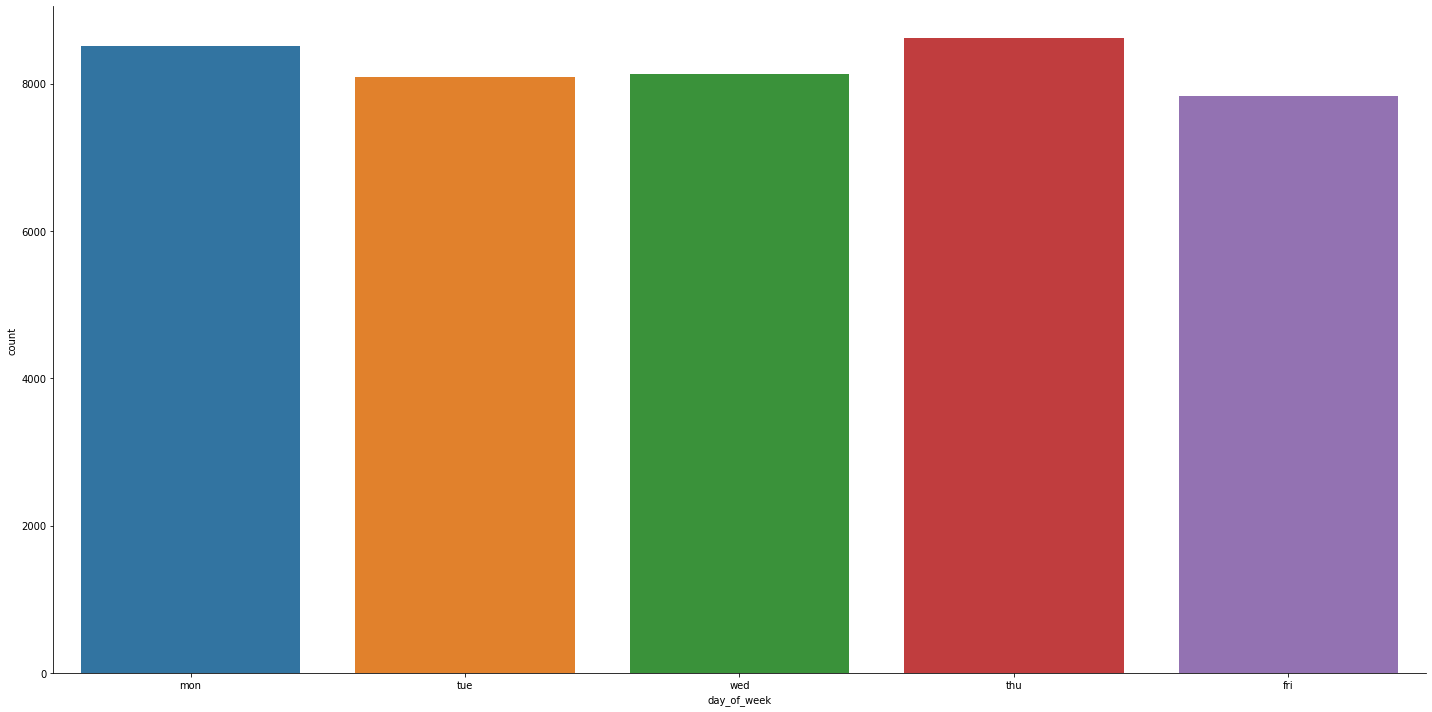

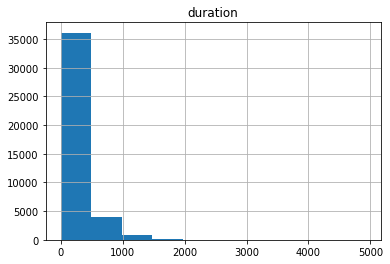

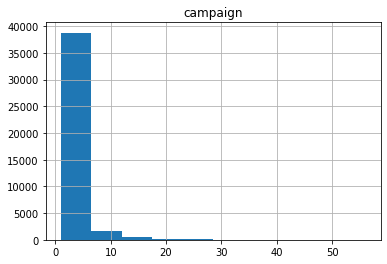

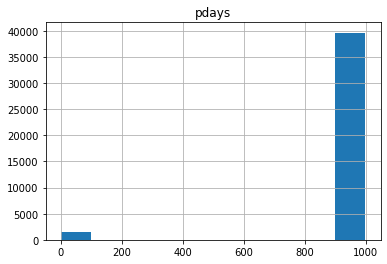

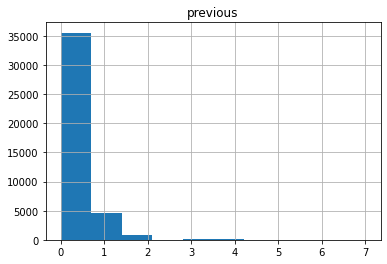

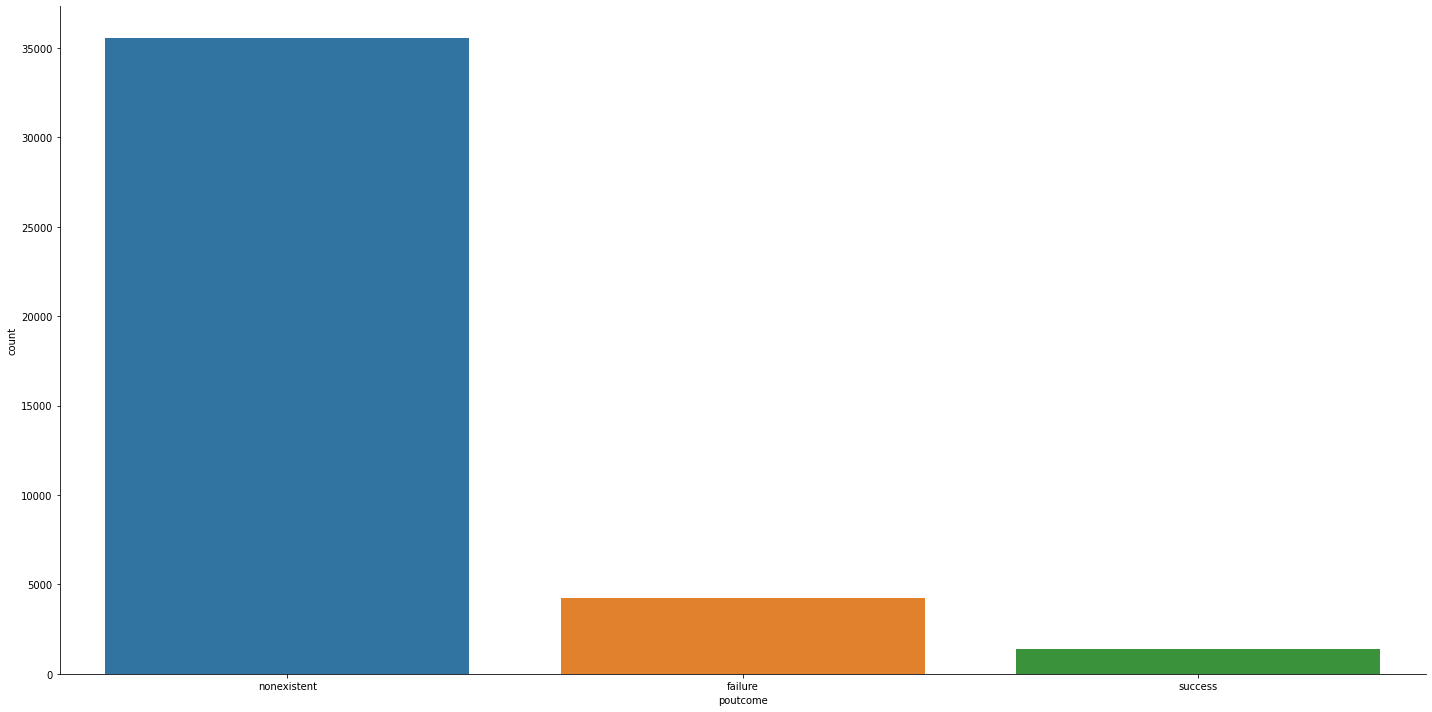

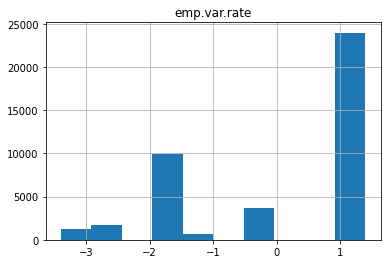

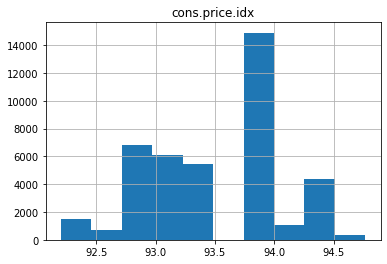

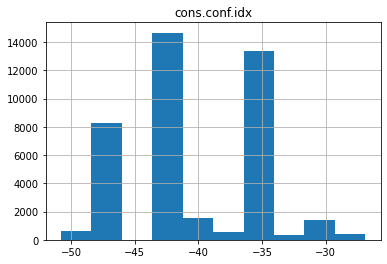

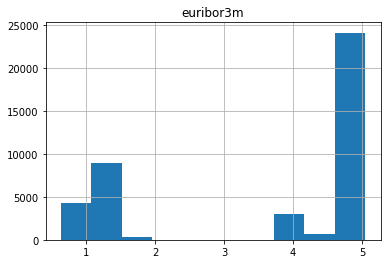

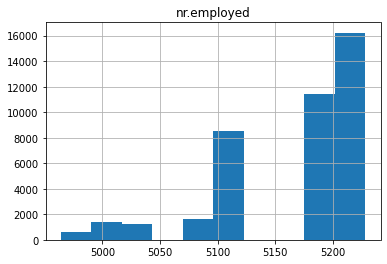

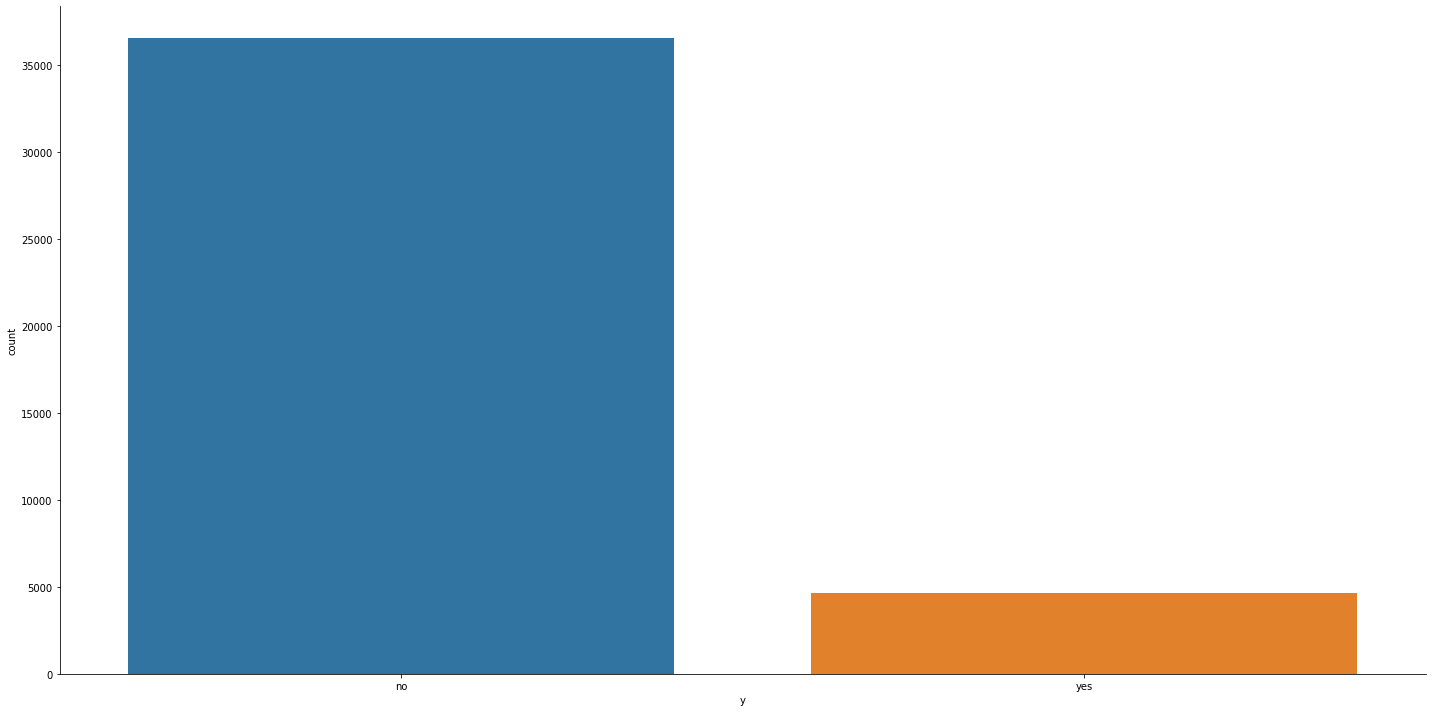

In [18]:
orgWithoutDupsClass = originalSetWithoutDups['y']
orgWithoutDupsFeatures = originalSetWithoutDups.loc[:, originalSetWithoutDups.columns != 'y']
categoricFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes == object].index)
numericFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes != object].index)
for column in originalSetWithoutDups.columns:
    #print('Value distribution for column \'' + column + '\' : \n')
    #print(originalSetWithoutDups[column].value_counts(), '\n')
    #print('Histogram for distribution of values for column \'' + column + '\' : \n')
    if (originalSetWithoutDups.dtypes[column].name.__eq__('object')):
        sb.catplot(x=column, kind='count', data=originalSetWithoutDups, height=10, aspect=2)
    else:
        originalSetWithoutDups.hist(column=column)

In [19]:
originalSetWithoutDups.mode(axis=0)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31.0,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.994,-36.4,4.857,5228.0,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation

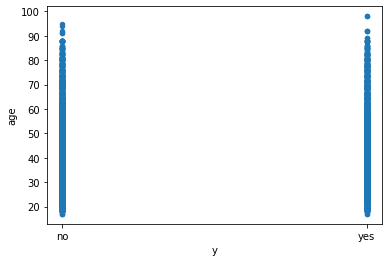

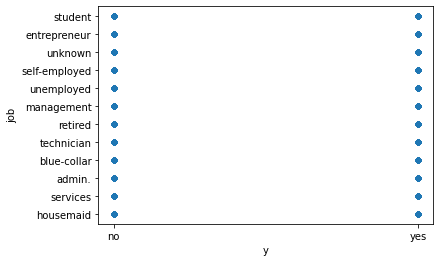

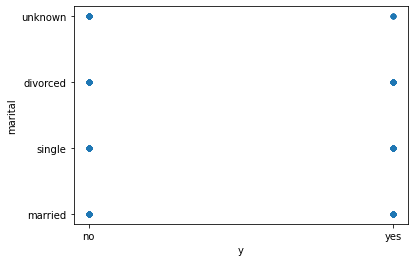

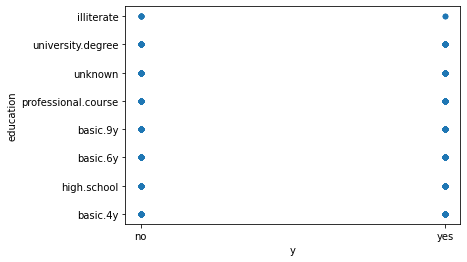

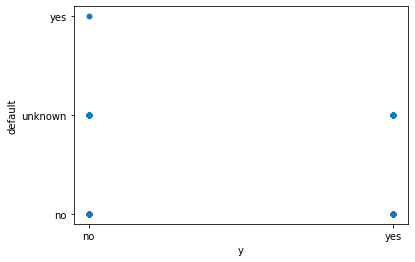

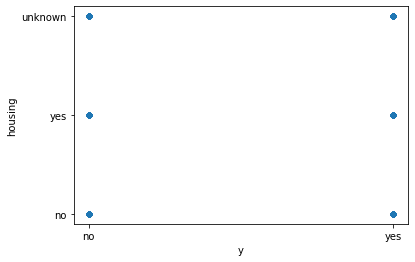

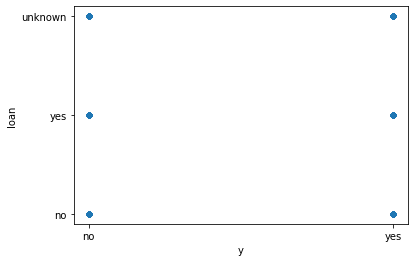

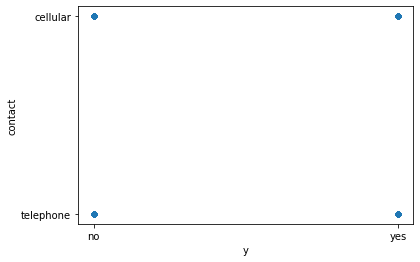

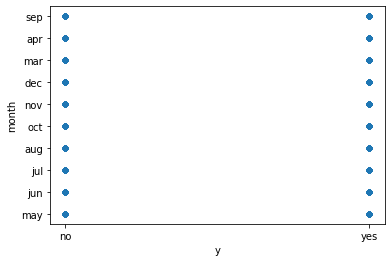

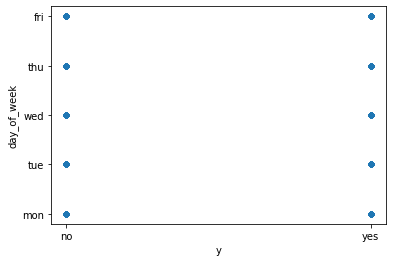

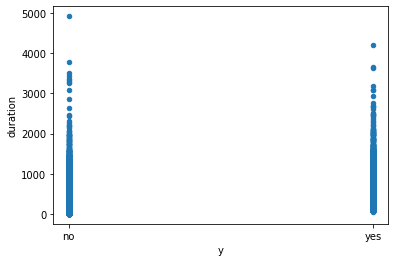

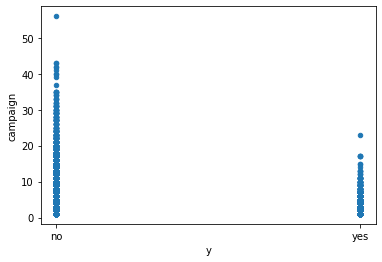

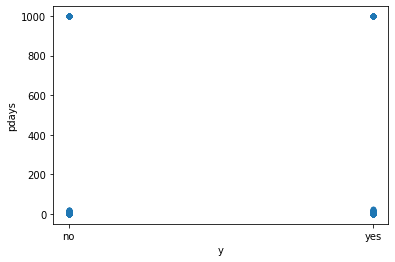

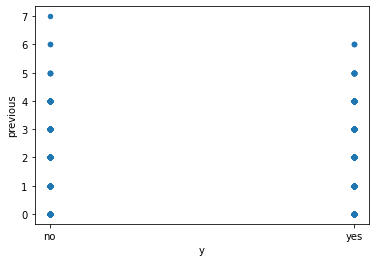

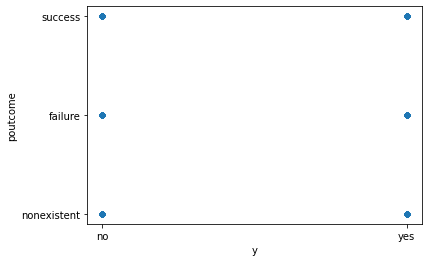

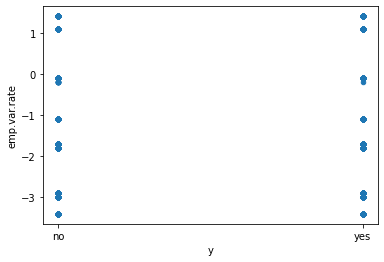

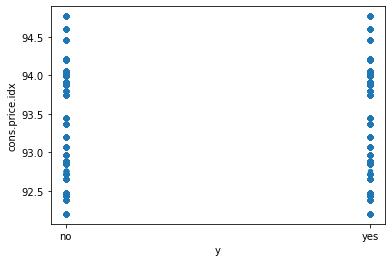

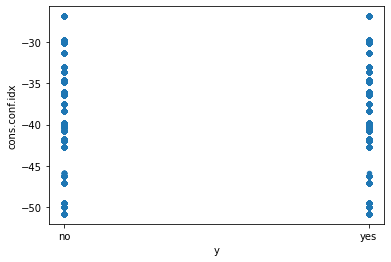

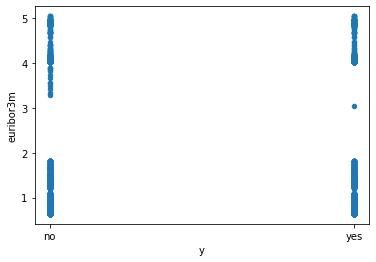

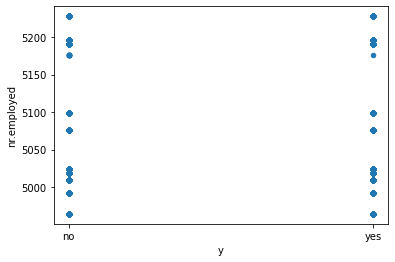

In [20]:
for column in originalSetWithoutDups.columns:
    if (column != 'y'):
        originalSetWithoutDups.plot(x='y', y=column, kind='scatter')

<AxesSubplot:>

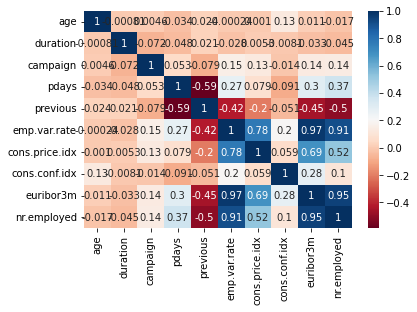

In [21]:
#originalSetWithoutDups.corr(method='kendall')
sb.heatmap(originalSetWithoutDups.corr(method='pearson'), annot=True, cmap='RdBu')

# Prepare data

In [30]:
#meanImputer = Imputer(strategy='')
check = []
originalDataWithoutUnknown = originalSetWithoutDups.copy(deep=True)
for column in originalSetWithoutDups.columns:
    if (column != 'default' and originalSetWithoutDups.dtypes[column].name.__eq__('object')):
      valueForReplace = originalSetWithoutDups[column].mode()[0]
      originalDataWithoutUnknown[column] = originalSetWithoutDups[column].replace("unknown", valueForReplace)
      print(originalDataWithoutUnknown[column].value_counts + '\n')

#colTrans = ColumnTransformer(
  #  ['num', ]
#)

TypeError: unsupported operand type(s) for +: 'method' and 'str'

# Models and cross-validation

In [ ]:
#pipeline